# Geometry

This lesson brings you a bit back to highschool math: (Euclidian) Geometry,
hopefully with more fun as within (geo)spatial IT/GIS we usually deal with
real-world objects (roads, lakes, forests, etc) abstracted as geometries.

> *Geometry (from the Ancient Greek: γεωμετρία; geo- "earth", -metron "measurement")*
> *is a branch of mathematics concerned with questions of shape, size, relative*
> *position of figures, and the properties of space.* Source: [Wikipedia](https://en.wikipedia.org/wiki/Geometry)

Within the geospatial domain we mainly deal with **Geometries** (at least for Vector data)
where Euclidian math applies. Vector data is encoded with coordinates
mostly X, Y (sometimes also Z for 3D) representing **three basic Geometry types**:

* **Points**
* **Lines** (a.k.a. LineStrings, Curves)
* **Polygons** (a.k.a. Surfaces)

These are used to represent phenomenons like:

* city centers, Point of Interests (PoIs), ...   (Points)
* roads, rivers, ... (Lines)
* forests, lakes, countries, ... (Polygons)

To make it a bit more complex: these three basic Geometries are often extended and even
combined to form collections called **"Multi" Geometries**:

* a collection of Points is called a *MultiPoint*
* a collection of Lines is called a *MultiLine* (a.k.a. *MultiLineString*)
* a collection of Polygons is called a  *MultiPolygon* (a.k.a. *MultiSurface*)  

These collections are useful for modeling certain kinds of features.
A collection of borders for a country is typically a *MultiLine(String)* (think of UK borders,..hint: Northern Ireland).
A country like Greece, The Netherlands or Canada is typically
a *MultiPolygon* (think of: mainland + islands). A Polygon can even have **holes** (think of *Enclaves*).

We will be working mainly with [Shapely](https://shapely.readthedocs.io), a Python package for
set-theoretic analysis and manipulation of, yes, geometries!
Shapely provides a spatial data model (see image below) that basically implements
the above geometry types plus variants and the (mathematic) manipulations on these.

![Spatial data model](images/spatialdatamodel.png)
*Fundamental geometric objects that can be used in Python with* the [Shapely](https://shapely.readthedocs.io/en/latest/manual.html) *package*

## Background reading

* https://en.wikipedia.org/wiki/Geometry
* Shapely User Manual: https://shapely.readthedocs.io/en/stable/manual.html
* https://automating-gis-processes.github.io/CSC/notebooks/L1/geometric-objects.html
* Spatial Relations: [Dimensionally Extended nine-Intersection Model (DE-9IM)](https://en.wikipedia.org/wiki/DE-9IM)


## Shapely basics
Shapely is concerned with Geometries in general, not necessarily Geospatial geometries.
As such we can introduce Shapely basics using the well-known Euclidian X,Y plane.

### Shapely Points

In [1]:
from shapely.geometry import Point

point1 = Point(0.0, 0.0)

In [2]:
point1.area

0.0

In [3]:
point1.length

0.0

In [4]:
# Show Well-Known Text (WKT) representation
point1.wkt

'POINT (0 0)'

In [5]:
point2 = Point(3, 4)

# Pythagoras Theorem here!
point1.distance(point2)

5.0

### Shapely LineStrings


In [6]:
from shapely.geometry import LineString
line = LineString([(0, 0), (3, 4)])

In [7]:
line.area

0.0

In [8]:
line.length

5.0

### Shapely Polygons


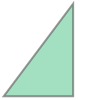

In [9]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (3, 4), (3, 0)])
polygon

In [10]:
# Convert coordinates to list
# polygon.coords does not exist!
list(polygon.exterior.coords)

[(0.0, 0.0), (3.0, 4.0), (3.0, 0.0), (0.0, 0.0)]

In [11]:
polygon.area

6.0

In [12]:
polygon.length

12.0

In [13]:
# Its x-y bounding box is a (minx, miny, maxx, maxy) tuple.
polygon.bounds

(0.0, 0.0, 3.0, 4.0)

### More on Shapely  

[Shapely](https://shapely.readthedocs.io/en/stable/manual.html) is a Python package for
set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module)
functions from the well-known and widely deployed [GEOS library](https://trac.osgeo.org/geos).
GEOS, a port of the [JTS Topology Suite](https://locationtech.github.io/jts) (JTS),
is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS and
many others like GDAL/OGR.

The designs of JTS and GEOS are largely guided by the
Open Geospatial Consortium‘s (OGC) and ISO 19125
*Simple Features (Access) Specification* [ref](https://en.wikipedia.org/wiki/Simple_Features).
Shapely adheres mainly to the same set of standard classes and operations.
Shapely is thereby deeply rooted in the conventions of the geographic information systems (GIS) world,
but aspires to be equally useful to programmers working on non-conventional problems.

From the [Shapely manual](https://shapely.readthedocs.io/en/stable/manual.html):

> **Relationships**
> The spatial data model is accompanied by a group of natural language relationships between
> geometric objects – *contains, intersects, overlaps, touches*, etc. – and a theoretical
> framework for understanding them using the 3x3 matrix of the mutual intersections
> of their component point sets: the [DE-9IM](https://en.wikipedia.org/wiki/DE-9IM).

> **Operations**
> Following the JTS technical specs .... make a distinction between constructive
> (*buffer, convex hull*) and set-theoretic operations (*intersection, union*, etc.).

So think of Shapely as providing a **Spatial (Class) Model** with functions/operations for:

* **Spatial Relationships** - *contains, intersects, overlaps, touches*, ...
* **Spatial Operations** - *buffer, convex hull, intersection, union*, ...

### Exploring spatial relationships with Shapely
Fundamental to Geometry-math are *Spatial Relationships*. See the simplified view below. More [on Wikipedia](https://en.wikipedia.org/wiki/Spatial_relation).

![(Topological) Spatial Relationships](images/spatialrelations.png)
*Examples of topological spatial relations - [By Krauss - Own work, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=21299138)*

If you want to dive into
a theoretical background, check out the [Dimensionally Extended nine-Intersection Model (DE-9IM)](https://en.wikipedia.org/wiki/DE-9IM).

Spatial Relationships are often central within *(Geo)Spatial Analysis* we will explore [later](06-data-analysis.ipynb).

Shapely has excellent support for *(Topological) Spatial Relationships*. With Shapely, we can solve tasks and questions like:

* What is the area of The Netherlands?
* What is the distance between Amsterdam and Athens?
* How long is The Donau?
* Do two features overlap or intersect? Does the Donau float through Romania?
* How does the common area of two features look like?
* Create a buffer area around the feature.
* ...

Thus before revoking to advanced analysis tools, already some
powerful GIS-questions can be solved with just Shapely alone! As a warm-up, let's explore
some of Shapely's spatial relationship functions here.

First some boolean operations (**Spatial Relationships**):


In [14]:
from shapely.geometry import LineString, Polygon

ls = LineString([(0, 0), (1, 1)])
ls.contains(Point(0.5, 0.5))

True

In [15]:
ls2 = LineString([(0, 1), (1, 0)])
ls.crosses(ls2)

True

In [16]:
polygon = Polygon([(0, 0), (3, 4), (3, 0)])
polygon.contains(Point(0.5, 0.5))

True

#### Analysis methods
Next some analysis methods that return new geometric objects.


In [17]:
ls = LineString([(0, 0), (1, 1)])
print(ls.centroid)

POINT (0.5 0.5)


In [18]:
ls2 = LineString([(0, 1), (1, 0)])
print(ls.intersection(ls2))

POINT (0.5 0.5)


In [19]:
polygon = Polygon([(1, 1), (1,2), (2,2), (2,1)])
ls3 = LineString([(0, 0), (3,3)])
print(polygon.intersection(ls3))

LINESTRING (1 1, 2 2)


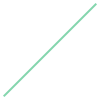

In [20]:
ls = LineString([(0, 0), (1, 1)])
ls

POLYGON ((0.8585786437626906 1.1414213562373094, 0.8731213431672709 1.1546020906725474, 0.8888859533960796 1.1662939224605091, 0.9057206526348005 1.176384252869671, 0.9234633135269821 1.1847759065022574, 0.9419430645491076 1.1913880671464419, 0.9609819355967744 1.196157056080646, 0.9803965719340879 1.1990369453344394, 1 1.2, 1.019603428065912 1.1990369453344394, 1.0390180644032256 1.196157056080646, 1.0580569354508924 1.1913880671464419, 1.076536686473018 1.1847759065022574, 1.0942793473651995 1.176384252869671, 1.1111140466039204 1.1662939224605091, 1.1268786568327291 1.1546020906725474, 1.1414213562373094 1.1414213562373094, 1.1546020906725474 1.1268786568327291, 1.1662939224605091 1.1111140466039204, 1.176384252869671 1.0942793473651995, 1.1847759065022574 1.076536686473018, 1.1913880671464419 1.0580569354508924, 1.196157056080646 1.0390180644032256, 1.1990369453344394 1.019603428065912, 1.2 1, 1.1990369453344394 0.9803965719340879, 1.196157056080646 0.9609819355967744, 1.1913880671

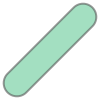

In [21]:
# Place a buffer around the LineString
poly1 = ls.buffer(0.2)
print(poly1)
poly1

We will revisit Shapely for more Spatial Relationships and Operations in the [Data Analysis Lesson](06-data-analysis.ipynb).


### About projections and Shapely

> *Shapely does not support coordinate system transformations.*
> *All operations on two or more features presume that the features exist in the same Cartesian plane.*
> Source: https://shapely.readthedocs.io/en/stable/manual.html#coordinate-systems

In Shapely, the distance is the Euclidean Distance or
Linear distance (Pythagoras Law!) between for example two points on a plane and not the
[Great-circle distance](https://en.wikipedia.org/wiki/Great-circle_distance) between two points on a sphere!
If you are working with data in WGS84 (EPSG:4326), 'lat/lon' (think of GPS coordinates) in degrees,
Shapely's calculations like `length` and `area` will not render what you would expect.

We have several options here. See also [this SE discussion](https://gis.stackexchange.com/questions/80881/what-is-unit-of-shapely-length-attribute):

* add-hoc: calculate the [Great Circle Distance](https://en.wikipedia.org/wiki/Great-circle_distance), using functions for the [Haversine Formula](https://en.wikipedia.org/wiki/Haversine_formula) or [Law of Cosines](https://en.wikipedia.org/wiki/Spherical_law_of_cosines).
* reproject your source data to a 'metric' projection like Web Mercator (EPSG:3857, worldwide, used for tiles by Google, OSM and others) using e.g. GDAL or GeoPandas (uses `pyproj`).
* use `pyproj` directly to apply the proper formulas

Below an example to illustrate:


In [22]:
from shapely.geometry import Point

point1 = Point(50.67, 4.62)
point2 = Point(51.67, 4.64)

# Shapely Distance in degrees
point1.distance(point2)

1.000199980003999

Using `pyproj` to do get real distance in km according to WGS84:


In [23]:
import pyproj
geod = pyproj.Geod(ellps='WGS84')
angle1,angle2,distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

# "Real" Distance in km
distance / 1000.0

110.9806766471818

---
[<- Introduction](01-introduction.ipynb) | [Spatial Reference Systems ->](03-spatial-reference-systems.ipynb)